# 소프트맥스 함수 (Softmax Function)

**소프트맥스(Softmax)** 함수는 다중 클래스 분류(Multi-class Classification) 문제에서 모델의 마지막 계층에 적용되는 활성화 함수(Activation Function)임. 모델의 출력값(logits)을 0과 1 사이의 값으로 변환하고, 모든 클래스에 대한 확률의 총합이 1이 되도록 만들어 줌.

이를 통해 각 클래스에 대한 예측 확률을 직관적으로 해석할 수 있음. 예를 들어, 3개의 클래스(고양이, 개, 새)를 분류하는 모델의 출력이 `[0.7, 0.2, 0.1]`이라면, 모델이 해당 입력을 '고양이'일 확률이 70%라고 예측한다는 의미임.

### 📐 수학적 배경

K개의 클래스가 있을 때, 모델의 출력 벡터 $z = (z_1, z_2, ..., z_K)$에 대한 소프트맥스 함수는 각 클래스 $i$에 대해 다음과 같이 정의됨.

$$ \text{Softmax}(z_i) = S(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

* $z_i$: i번째 클래스에 대한 모델의 원시 출력값(logit).
* $e^{z_i}$: 지수 함수. 입력값을 양수로 변환하고 값의 차이를 증폭시키는 역할을 함.
* $\sum_{j=1}^{K} e^{z_j}$: 모든 클래스의 지수 함수 값의 합. 출력을 정규화하여 총합이 1이 되도록 함.

#### 안정적인 계산 (Numerical Stability)
입력값 $z_i$가 매우 크면 $e^{z_i}$ 값이 기하급수적으로 커져 오버플로우(overflow)가 발생할 수 있음. 이를 방지하기 위해 입력 벡터의 최댓값($c = \max(z)$)을 각 요소에서 빼주는 방법을 사용함. 이 트릭은 수식적으로 결과가 동일함을 보장하면서 계산 안정성을 높여줌.

$$ S(z_i) = \frac{e^{z_i - c}}{\sum_{j=1}^{K} e^{z_j - c}} $$

### 셋업 (Setup)
계산 및 시각화를 위한 라이브러리 임포트.

In [1]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
신경망의 마지막 레이어에서 나온 출력(logits)이라고 가정한 간단한 벡터를 생성함.

In [2]:
# 3개의 클래스에 대한 모델의 로짓(logits) 출력 예시
logits = np.array([2.0, 1.0, 0.1])

print(f"입력 로짓 (logits): {logits}")

입력 로짓 (logits): [2.  1.  0.1]


### 핵심 로직 구현 (Code Implementation)
수학적으로 안정적인(Numerically Stable) 소프트맥스 함수를 구현함.

In [3]:
def softmax(z):
    """수치적으로 안정적인 소프트맥스 함수를 계산함."""
    # Step 1: 입력값에서 최댓값을 빼서 오버플로우 방지
    max_logit = np.max(z)
    stable_z = z - max_logit
    print(f"안정화된 로짓 (z - max(z)): {stable_z}")
    
    # Step 2: 각 요소에 지수 함수 적용
    exp_z = np.exp(stable_z)
    print(f"지수 적용 결과 (exp(stable_z)): {exp_z}")

    # Step 3: 지수 적용된 값들의 합 계산
    sum_exp_z = np.sum(exp_z)
    print(f"지수 값들의 합 (sum(exp(stable_z))): {sum_exp_z:.4f}")

    # Step 4: 각 요소를 합으로 나누어 확률 계산
    probabilities = exp_z / sum_exp_z
    
    return probabilities

# 함수를 사용하여 소프트맥스 확률 계산
softmax_probs = softmax(logits)

print(f"\n최종 Softmax 확률: {softmax_probs}")
print(f"확률의 총합: {np.sum(softmax_probs):.1f}")

안정화된 로짓 (z - max(z)): [ 0.  -1.  -1.9]
지수 적용 결과 (exp(stable_z)): [1.         0.36787944 0.14956862]
지수 값들의 합 (sum(exp(stable_z))): 1.5174

최종 Softmax 확률: [0.65900114 0.24243297 0.09856589]
확률의 총합: 1.0


### 📊 결과 확인 및 시각화 (Results & Visualization)
계산된 확률을 막대그래프로 시각화하여 분포를 직관적으로 확인.

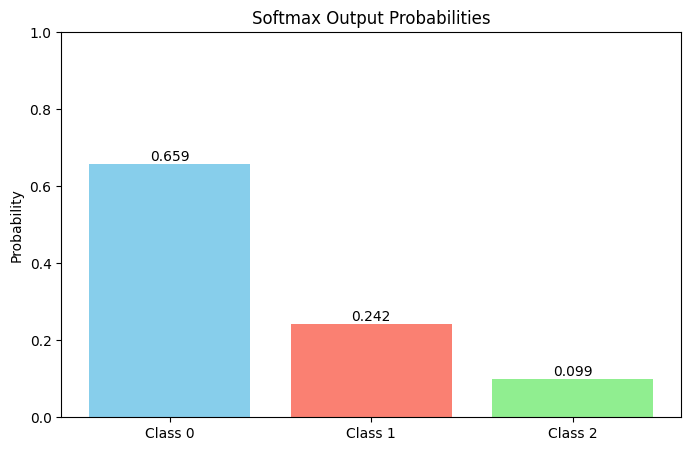

In [4]:
plt.figure(figsize=(8, 5))

class_names = ['Class 0', 'Class 1', 'Class 2']
bars = plt.bar(class_names, softmax_probs, color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Softmax Output Probabilities')
plt.ylabel('Probability')
plt.ylim(0, 1.0) # Y축 범위를 0과 1 사이로 설정

# 각 막대 위에 확률 값을 텍스트로 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

plt.show()

### 고려사항 (Considerations)

* **소프트맥스와 손실 함수**: 소프트맥스 함수 자체는 손실 함수가 아님. 이것은 모델의 출력을 확률로 변환하는 활성화 함수임. 다중 클래스 분류 모델을 학습시킬 때는 일반적으로 소프트맥스 함수의 출력과 **크로스 엔트로피(Cross-Entropy)** 손실 함수를 함께 사용함. 크로스 엔트로피는 소프트맥스가 출력한 확률 분포와 실제 정답의 확률 분포(예: one-hot vector) 사이의 차이를 측정하는 역할을 함.

* **온도(Temperature) 매개변수**: 소프트맥스 수식에 온도(T)라는 하이퍼파라미터를 추가하여 확률 분포의 부드러움을 조절할 수 있음. $S(z_i) = \frac{e^{z_i/T}}{\sum_j e^{z_j/T}}$. T가 1보다 크면 분포가 부드러워지고(uniform에 가까워짐), 1보다 작으면 분포가 뾰족해짐(one-hot에 가까워짐).

### 최종 요약 (Conclusion)

소프트맥스 함수는 다중 클래스 분류 문제에서 신경망의 최종 출력(logits)을 각 클래스에 대한 확률 분포로 변환하는 핵심적인 역할을 함. 이 변환된 확률은 모델의 예측 결과를 해석 가능하게 만들고, 크로스 엔트로피와 같은 손실 함수와 결합하여 모델을 효과적으로 학습시키는 데 사용됨.

이 노트북에서는 소프트맥스의 계산 과정을 단계별로 구현하고, 특히 계산 안정성을 확보하기 위한 기법을 적용해봄. 시각화를 통해 소프트맥스 출력이 어떻게 각 클래스에 대한 신뢰도를 확률로 나타내는지 확인함.